<a href="https://colab.research.google.com/github/alonsodiaxz/TensorFlowExamples/blob/main/Celsius.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf #Biblioteca de inteligencia artificial
import numpy as np #Trabajar fácilmente con arrays



In [2]:
celsius = np.array([-40, -10, 0, 8, 15 ,22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59 ,72, 100], dtype=float)

In [9]:
from tensorflow.python.ops.gen_array_ops import shape
#capa = tf.keras.layers.Dense(units=1, input_shape=[1]) #Con units le indicas las neuronas que tendra la capa, input shape muestra que tenemos 
#una capa de entrada con una neurona tambien
#Necesitamos usar un modelo de keras para darle las capas y poder trabajar con él. Hay varios tipos de modelos en este caso usaremos el secuencial
#Los otros modelos son para redes neuronales mas avanzadas.

#Ahora le añadimos dos capas intermedias con 3 neuronas cada una.
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3, )
salida = tf.keras.layers.Dense(units=1, )
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [10]:
#Hay que decirle algunas propiedades de como procesar esas matematicas para poder aprender mejor. De momento, solo le diremos dos propiedades. El optimizador 
#y la funcion de perdida. En el optimizador utilizaremos adam ya que permite a la red saber como ajustar los pesos y sesgos de manera eficiente para que aprenda y no desaprenda.
#Es decir, que poco a poco vaya mejorando y no empeorando.
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error' #Unca poca antidad de errores grande es peor que una gran cantidad de errores pequeños

)

In [11]:
print('Comenzado entrenamiento...')
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print('Modelo entrenado!')

Comenzado entrenamiento...
Modelo entrenado!


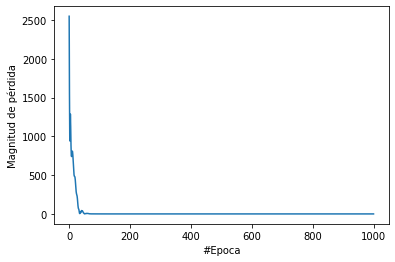

In [12]:
#Antes de comenzar hay que revisar la función de pérdida, esta función básicamente nos dice que tan mal estan los resultados de la red en cada vuelta que dio.
import matplotlib.pyplot as plt
plt.xlabel("#Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [13]:
print("Hagmos una predicción!")
resultado = modelo.predict([100.0])
print("El resultado es " + str(resultado) + "farenheit!")

Hagmos una predicción!
El resultado es [[211.74742]]farenheit!


In [15]:
print("Variales internas del modelo")
print(oculta1.get_weights()) #Obtener el peso, primer elemento, y el sesgo, segundo elemento.
print(oculta2.get_weights())
print(salida.get_weights())

Variales internas del modelo
[array([[-0.82051826, -0.02501885, -0.15333867]], dtype=float32), array([-3.7042542, -3.4467268,  2.2180853], dtype=float32)]
[array([[-0.20391554, -0.03837975,  1.2775644 ],
       [ 0.43267494, -0.8618709 ,  1.2176607 ],
       [ 0.9137573 , -0.9237229 , -0.745337  ]], dtype=float32), array([ 2.6633873,  2.4272637, -3.5235376], dtype=float32)]
[array([[ 0.49587983],
       [ 0.5810286 ],
       [-1.7385248 ]], dtype=float32), array([3.439389], dtype=float32)]
